In [1]:
import torch
from tqdm import tqdm
import numpy as np
args_cuda = torch.cuda.is_available()

from GraphReshape import utils, models, train
%matplotlib inline

# CLEAN GRAPH

In [2]:
labels, features, split_train, split_val, split_unlabeled, raw_adj = utils.load_data(name='citeseer_0.1_minmax.npy', dataset='citeseer.npz', attack=False)

Selecting 1 largest connected components


e:\anaconda\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [3]:
adj = utils.preprocess_graph(raw_adj).toarray()
adj = torch.Tensor(adj)
if args_cuda:
    adj = adj.cuda()

In [4]:
l = []
for i in tqdm(range(20)):
    model, acc = train.get_gcn(labels, features, adj, split_train, split_val, split_unlabeled)
    l.append(acc)
l.sort()
acc = np.mean(l[1:-1])

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.64s/it]


In [5]:
embedding = model(features, adj)[1].detach().cpu().numpy()

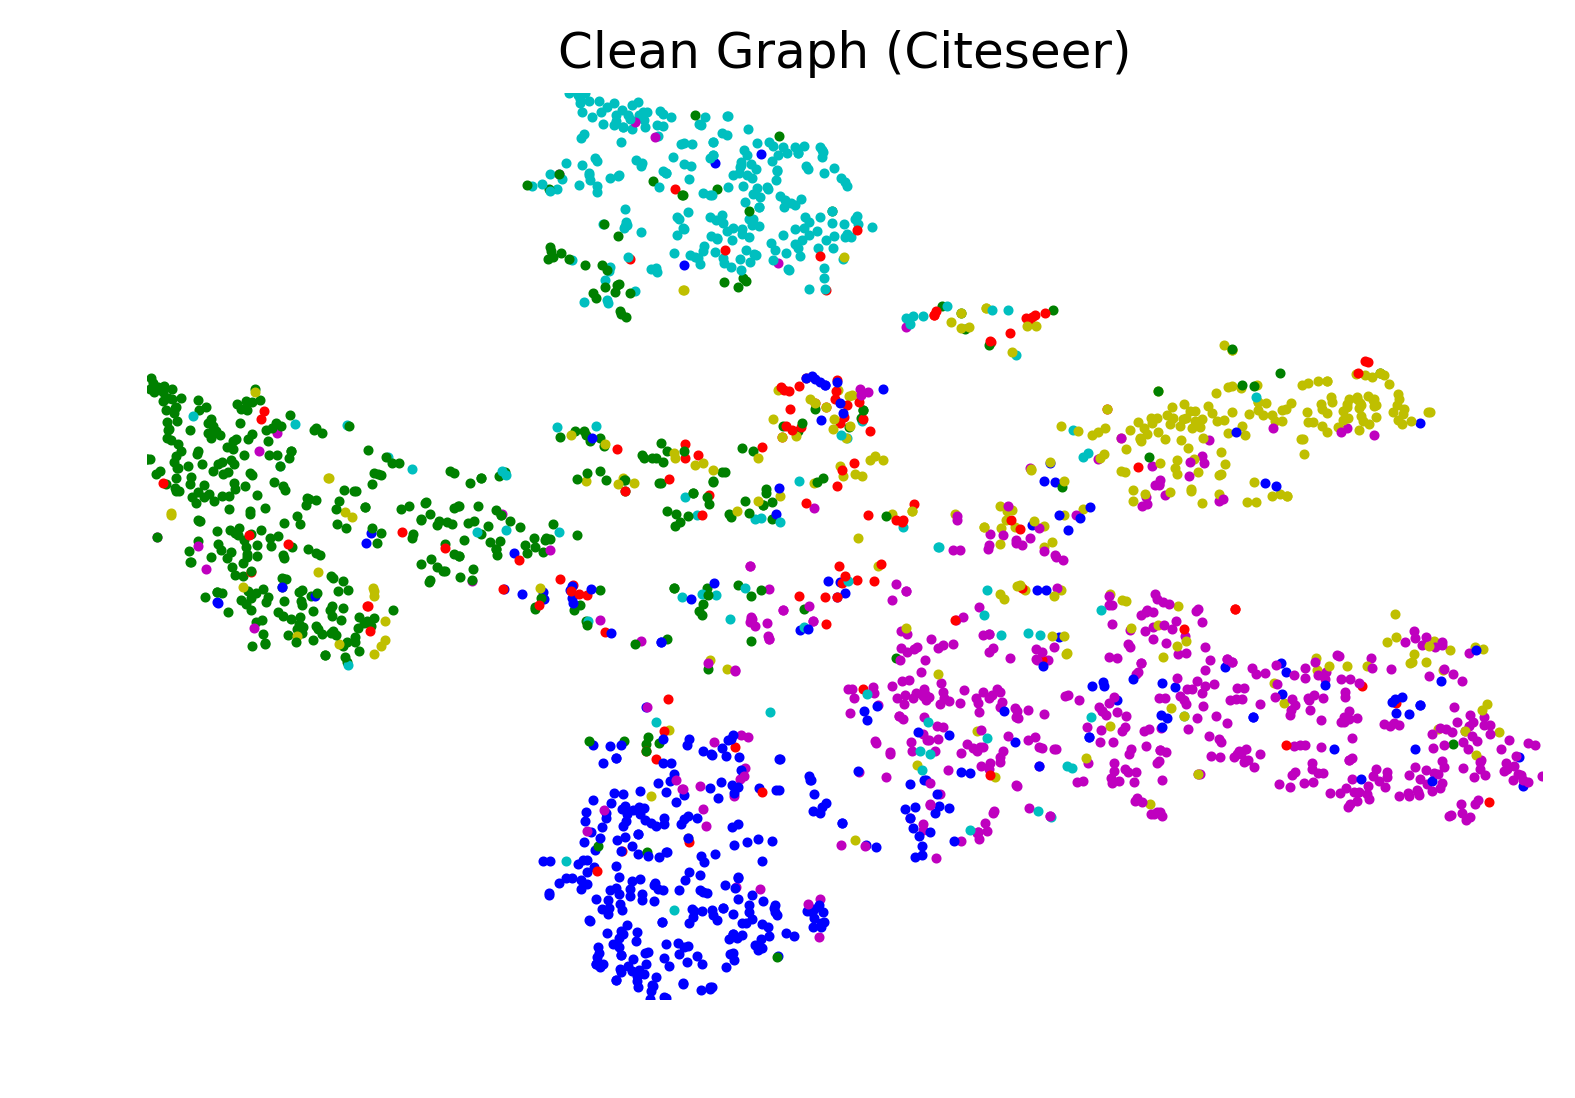

In [7]:
utils.plot_with_labels(embedding, labels, 'Citeseer', 'Clean')

In [8]:
print('Accuracy on clean graph: '+ str(acc)[:6])

Accuracy on clean graph: 0.6990


# POISONED GRAPH

In [9]:
labels, features, split_train, split_val, split_unlabeled, raw_adj = utils.load_data(name='citeseer_0.1_minmax.npy', dataset='citeseer.npz', attack=True)

Selecting 1 largest connected components


e:\anaconda\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [10]:
adj = utils.preprocess_graph(raw_adj).toarray()
adj = torch.Tensor(adj)
if args_cuda:
    adj = adj.cuda()

In [11]:
l = []
for i in tqdm(range(20)):
    model, acc = train.get_gcn(labels, features, adj, split_train, split_val, split_unlabeled)
    l.append(acc)
l.sort()
acc = np.mean(l[1:-1])

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:47<00:00,  3.72s/it]


In [12]:
embedding = model(features, adj)[1].detach().cpu().numpy()

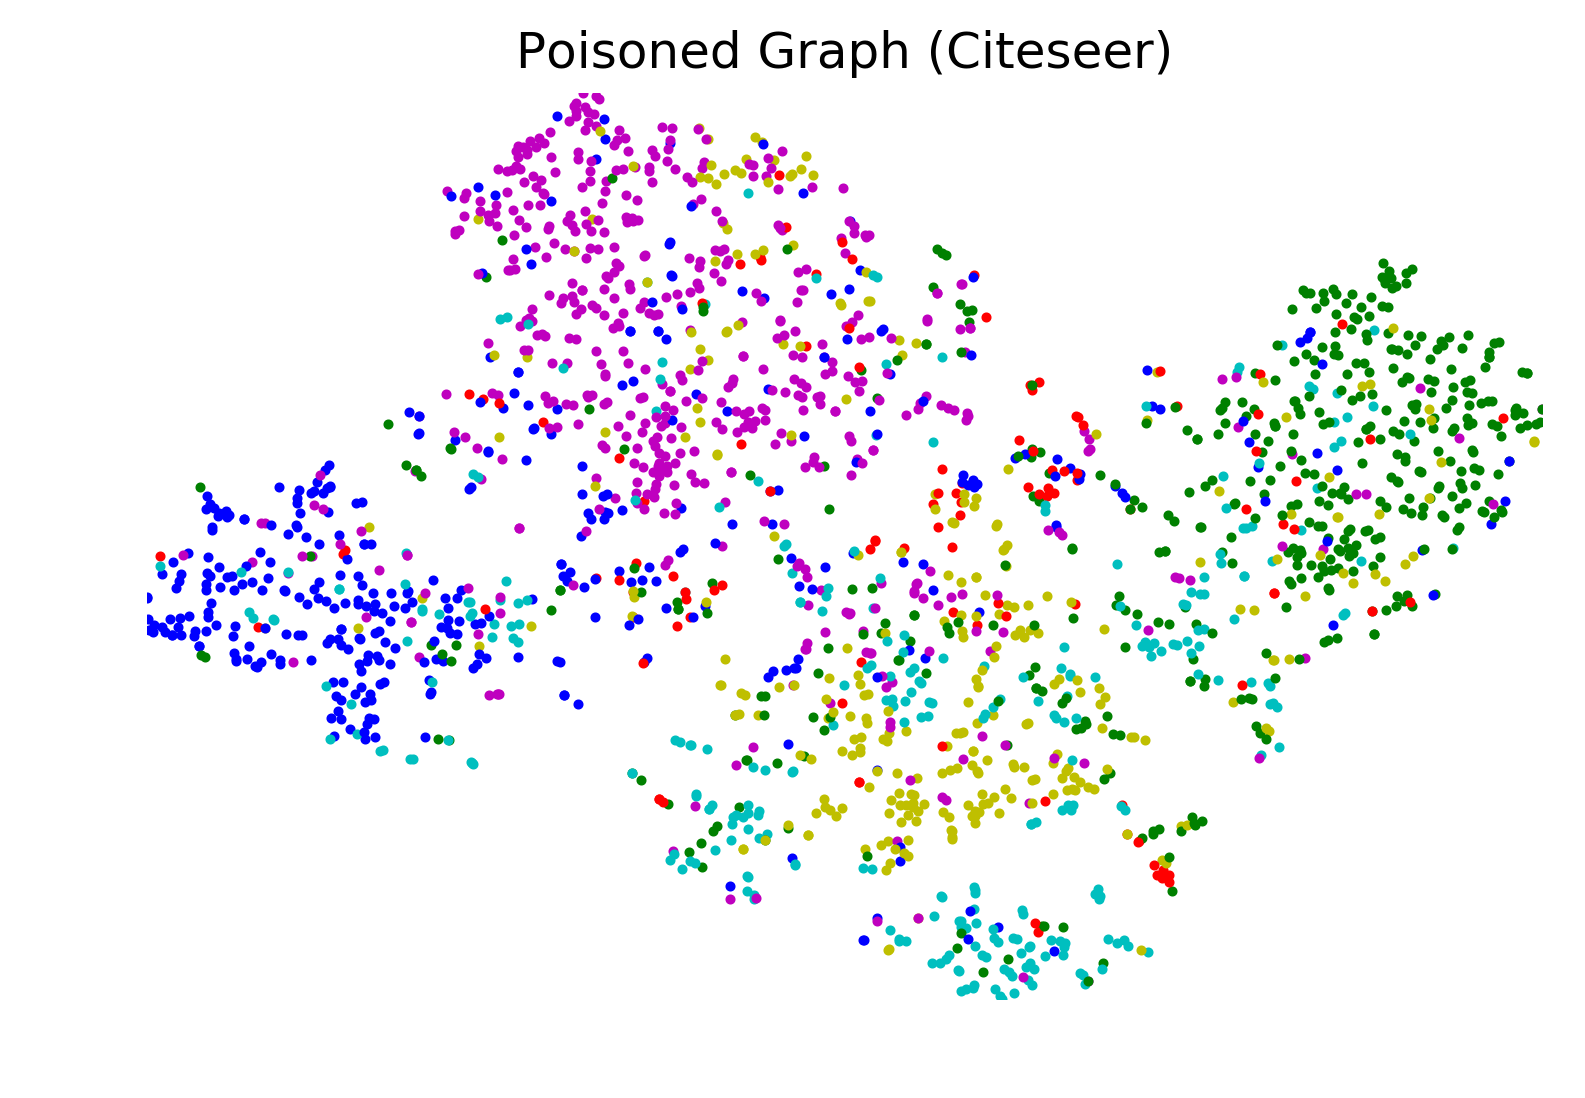

In [13]:
utils.plot_with_labels(embedding, labels, 'Citeseer', 'Poisoned')

In [14]:
print('Accuracy on poisoned graph: '+ str(acc)[:6])

Accuracy on poisoned graph: 0.5636


# GrapReshape

In [15]:
adj, model = train.graphreshape(raw_adj, features, labels, split_train, split_val, split_unlabeled, n_sample=1, lr=5e-4, weight_decay=5e-6, h_dim=50 ,threold=0.7)

C:\Users\chenxin\Desktop\folder\gcn\server\GraphReshape\GraphReshape\utils.py:90: RuntimeWarning: divide by zero encountered in power
  degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -0.5))


abnormal detect.....


C:\Users\chenxin\Desktop\folder\gcn\server\GraphReshape\GraphReshape\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  h = F.softmax(h)


Early stopping!
--------------------------------------------------


e:\anaconda\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


graph reshape........


100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [01:17<00:00,  1.71it/s]


In [16]:
adj = utils.preprocess_graph(adj).toarray()
adj = torch.Tensor(adj)
if args_cuda:
    adj = adj.cuda()

In [17]:
l = []
for i in tqdm(range(20)):
    model, acc = train.get_gcn(labels, features, adj, split_train, split_val, split_unlabeled)
    l.append(acc)
l.sort()
acc = np.mean(l[1:-1])

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:17<00:00,  3.89s/it]


In [18]:
embedding = model(features, adj)[1].detach().cpu().numpy()

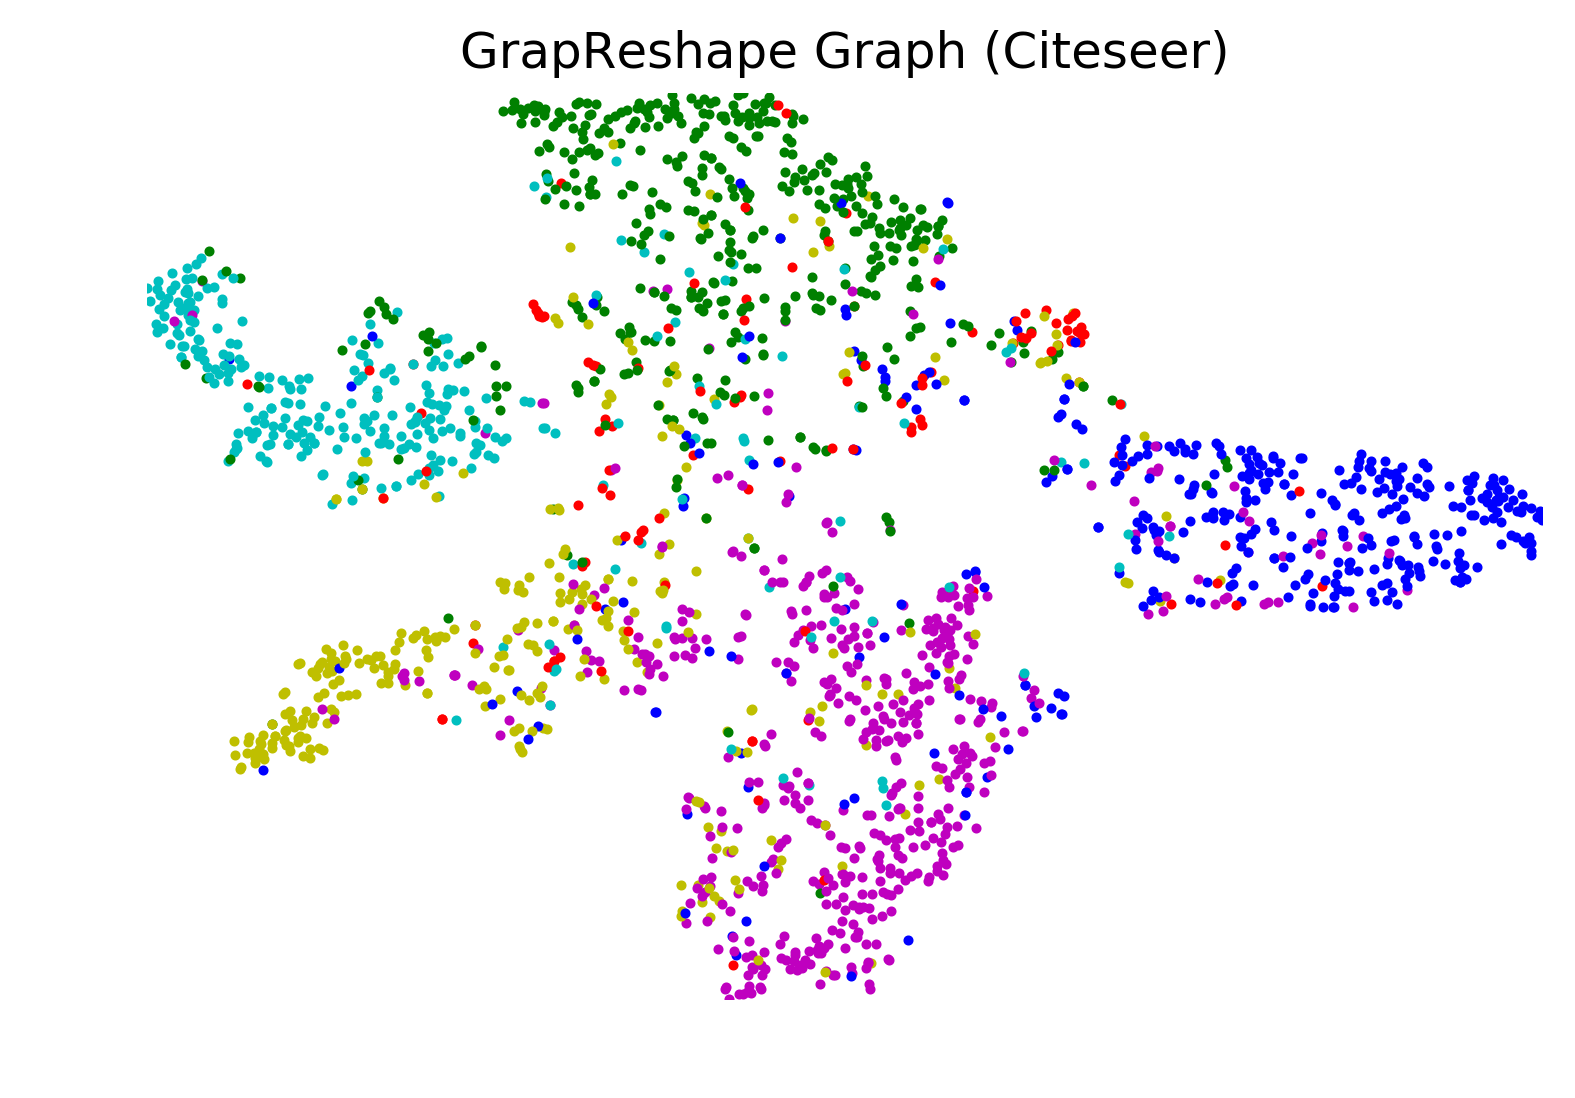

In [19]:
utils.plot_with_labels(embedding, labels, 'Citeseer', 'GraphReshape')

In [20]:
print('Accuracy on graphreshape graph: '+ str(acc)[:6])

Accuracy on graphreshape graph: 0.7072
